<a href="https://colab.research.google.com/github/pigyechan/ML_22-2/blob/main/ML_2019101412_%EC%9D%B4%EC%98%88%EC%B0%AC_%EA%B3%BC%EC%A0%9C3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#[과제 3] Machine Learning of Multiple Features
##**컴퓨터 메카트로닉스공학부 소프트웨어전공**
###**2019101412 이예찬**

###*행복지수를 예측하는 모델 만들기*
> 요소 3가지(숙면시간, 운동시간, 취미활동시간)을 가지고 그 날의 행복 지수를 예측하는 모델을 만들고자 한다.

In [1]:
import pandas as pd #pandas 모듈을 pd라는 이름으로 불러오기
import numpy as np #numpy 모듈을 np라는 이름으로 불러오기
from numpy import random #numpy의 서브모듈인 random을 이용하여 난수를 생성.
import sklearn

#랜덤하게 난수를 생성해서 중복이 없는 train set, target set 만드는 함수 먼저 생성
def Random_train(a,b):
    train_list = []
    train_fin_list = []
    train_set = set() #중복이 없지만 순서가 상관없는 set형태 사용.

    while len(train_set) < 1000000: #train_set의 길이가 100만일때까지 실행
        for i in range(1000000-len(train_set)): #100만에서 train_set의 길이를 뺀 만큼 실행.
            num = round(random.uniform(a,b),6) #소수점 여섯번째까지 a부터 b사이의 실수인 난수 생성
            train_list.append(num) #train_list에 하나씩 list형태로 넣음.
        train_set = set.union(train_set, set(train_list)) #합집합 형태로 중복되는 값 제거
    train_fin_list = list(train_set) #train_set의 길이가 100만이 되면 이 set형태를 list형태로 바꾸어 train_fin_list에 넣어줌.
    
    #train_fin_list를 순서대로 sort한 list를 return
    return sorted(train_fin_list) 

#위에서 만들었던 함수를 이용하여 각각의 요소에 해당하는 값을 범위에 맞게 생성
sleep_min = Random_train(0,36000) 
excercise_min = Random_train(0,7200)
hobby_min = Random_train(0,18000)
happy_num = Random_train(0,1000)

#갯수 출력
print(len(sleep_min), len(excercise_min), len(hobby_min), len(happy_num))

1000000 1000000 1000000 1000000


In [2]:
#데이터프레임 형태로 만들어 데이터 전처리 준비.
#데이터프레임의 모양, 앞의 데이터 10개, 데이터프레임의 정보를 보여줌.
df = pd.DataFrame({'숙면시간(초)' : sleep_min, '운동시간(초)' : excercise_min, '취미활동시간(초)' : hobby_min, '행복점수': happy_num})
print(df.shape)
print(df.head(10))
print(df.info())

(1000000, 4)
    숙면시간(초)   운동시간(초)  취미활동시간(초)      행복점수
0  0.024906  0.001220   0.017536  0.002720
1  0.050369  0.002381   0.018818  0.003127
2  0.079608  0.022079   0.033595  0.003425
3  0.160958  0.023133   0.058823  0.003464
4  0.182142  0.039701   0.067925  0.003574
5  0.216832  0.041997   0.100557  0.004105
6  0.265735  0.044840   0.103097  0.004707
7  0.267096  0.054965   0.121097  0.004897
8  0.274104  0.056768   0.122940  0.006039
9  0.312868  0.076202   0.123170  0.006415
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   숙면시간(초)    1000000 non-null  float64
 1   운동시간(초)    1000000 non-null  float64
 2   취미활동시간(초)  1000000 non-null  float64
 3   행복점수       1000000 non-null  float64
dtypes: float64(4)
memory usage: 30.5 MB
None


In [3]:
df_shuffled=sklearn.utils.shuffle(df) #데이터프레임에서 sklearn 라이브러리를 사용해 인덱스를 섞음.
happy_full=df_shuffled.to_numpy()
print(happy_full)

[[30665.468598  6130.334287 15318.828003   851.723698]
 [ 2065.34579    412.318896  1032.75189     57.121877]
 [24636.369938  4927.270762 12306.050702   683.895421]
 ...
 [31443.282812  6289.497956 15713.297125   873.321125]
 [33889.222778  6775.734356 16935.213132   940.798547]
 [ 4445.119622   891.050448  2222.726179   123.005203]]


In [4]:
happy_train = happy_full[:700000, 0:3] #넘파이 배열의 쓸 만큼의 배열의 첫번째부터 세번째 행까지 train data로 사용. 
happy_test = happy_full[:700000,3] #넘파이 배열의 쓸 만큼의 배열의 마지막 줄인 행복점수를 test data로 사용.

print(happy_train)
print(happy_test)

[[30665.468598  6130.334287 15318.828003]
 [ 2065.34579    412.318896  1032.75189 ]
 [24636.369938  4927.270762 12306.050702]
 ...
 [27885.353285  5573.504522 13931.259681]
 [ 4403.073449   882.763317  2201.863337]
 [ 1997.517116   398.664731  1001.152243]]
[851.723698  57.121877 683.895421 ... 774.651329 121.817489  55.296574]


In [5]:
#train_test_split모듈을 이용하여 학습과 테스트 세트 분리
from sklearn.model_selection import train_test_split

#앞에서 만들어준 데이터프레임 df와 난수를 통해 만들어 준 happy_num 데이터 100만개를 가지고 학습과 테스트 세트 분리.
#sklearn에서 random_state라는 인자는 수행 시마다 동일한 결과를 얻기 위해 적용.
#이 random함수의 seed를 고정시키기 위해 여러번 수행하더라도 같은 레코드 추출. 
#따라서 train set와 test set를 고정시키는 역할.
train_input, test_input, train_target, test_target = train_test_split(happy_train, happy_test, random_state=42)
print(len(train_input), len(test_input), len(train_target), len(test_target))

525000 175000 525000 175000


###*데이터 표준화와 정규화 과정*

In [6]:
#표준화와 정규화를 하기 위해 다음의 클래스를 가져와 사용.
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#값들이 표준정규분포(평균이 0, 표준편차가 1)에 있도록 변환함.
ss = StandardScaler()

#우리가 만든 모델이 train data의 평균과 분산을 학습해야 하니까 train data에 한해서만 fit과정을 거치고
#test data는 transform만 해줌. 새로운 데이터여야 하니까.
train_ss_scaled = ss.fit_transform(train_input)
test_ss_scaled = ss.transform(test_input)

In [7]:
print(f"train set 표준화 후 평균\n{train_ss_scaled.mean()}")
print(f"train set 표준화 후 분산\n{train_ss_scaled.var()}\n")

print(f"test set 표준화 후 평균\n{test_ss_scaled.mean()}")
print(f"test set 표준화 후 분산\n{test_ss_scaled.var()}\n")

train set 표준화 후 평균
1.6168918761202746e-14
train set 표준화 후 분산
0.999999999999997

test set 표준화 후 평균
-0.0009714388624851381
test set 표준화 후 분산
0.9979718903647947



###*다중 회귀 모델*

In [8]:
#PolynomialFeatures를 통한 특성을 만들 필요가 없기 때문에 그 과정은 생략하고 바로 다중 회귀모델을 훈련함.
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_ss_scaled, train_target)
print(lr.score(train_ss_scaled, train_target))
print(lr.score(test_ss_scaled, test_target))

0.9999993404932557
0.9999993371773832


* 위의 결과를 봤을 땐 아주 미세한 차이이지만 과소적합이 일어난 것을 알 수 있음. 또한 두 점수가 너무 높기 때문에 과적합이 일어났다고 말할 수 있음.

>***1. 처음 100만개의 데이터를 생성할 때 데이터의 갯수를 좀 줄여보기도 하고 2. train data와 test data를 선정할 때 원래 100만개를 다 썼던 데이터를 점점 줄여가며 쓰거나 3. 데이터 사이의 차이를 주기 위해 소수점 자리수를 조절해 보기도 했지만 두 스코어 값이 높게 거의 비슷하게 나오거나 과소적합의 형태로 나오는 것을 볼 수 있었다.***
-------------------------------------------------------------------------

* 먼저 릿지 회귀부터 진행한 후에 이 문제를 해결해 보고자 한다.

>***릿지 회귀에서도 비슷한 결과를 얻을 수 있었으며 데이터 사이의 차이가 많이 없는 탓인 듯하다.***

###*릿지 회귀*

>계수를 곱한 값을 기준으로 규제를 적용함.

In [9]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_ss_scaled, train_target)

print(ridge.score(train_ss_scaled, train_target))
print(ridge.score(test_ss_scaled, test_target))

0.9999988001945948
0.999998801266299


* 릿지 모델을 사용했을땐 조금 나아지는 현상을 볼 수 있다. 그렇지만 거의 완벽에 가까운 모델이 나오는 모습을 봐서 과적합이라고 볼 수 있다.
* 알파값 규제를 통해서 규제의 강도를 조절한다.

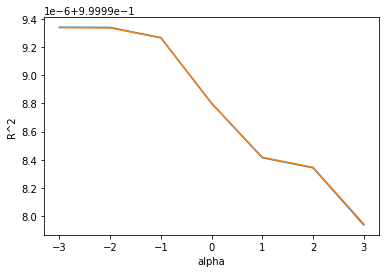

In [10]:
import matplotlib.pyplot as plt

train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100,1000]

for alpha in alpha_list:
    # 릿지 모델을 만듭니다
    ridge = Ridge(alpha=alpha)
    # 릿지 모델을 훈련합니다
    ridge.fit(train_ss_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(ridge.score(train_ss_scaled, train_target))
    test_score.append(ridge.score(test_ss_scaled, test_target))
    
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

####어떤 알파값이 최적인지 찾는 과정

>앞에서 표준화를 통해 구한 score값들을 가지고 릿지 모델의 최적의 알파값 도출. 마지막의 train과 test의 score차가 가장 적게 나는 계수를 가지고 사용.

In [11]:
ridge = Ridge(alpha=0.001) 
ridge.fit(train_ss_scaled, train_target)
print(ridge.score(train_ss_scaled, train_target))
print(ridge.score(test_ss_scaled, test_target))
print((ridge.score(train_ss_scaled, train_target)-ridge.score(test_ss_scaled, test_target))*(10**10))

0.9999993404745757
0.9999993371837939
32.90781869225157


In [12]:
ridge = Ridge(alpha=0.01)
ridge.fit(train_ss_scaled, train_target)

print(ridge.score(train_ss_scaled, train_target))
print(ridge.score(test_ss_scaled, test_target))
print((ridge.score(train_ss_scaled, train_target)-ridge.score(test_ss_scaled, test_target))*(10**10))

0.9999993388186597
0.999999335739333
30.793266825313026


In [13]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_ss_scaled, train_target)

print(ridge.score(train_ss_scaled, train_target))
print(ridge.score(test_ss_scaled, test_target))
print((ridge.score(train_ss_scaled, train_target)-ridge.score(test_ss_scaled, test_target))*(10**10))

0.9999992663551562
0.9999992646001442
17.550120245957146


In [14]:
ridge = Ridge(alpha=1) 
ridge.fit(train_ss_scaled, train_target)

print(ridge.score(train_ss_scaled, train_target))
print(ridge.score(test_ss_scaled, test_target))
print((ridge.score(train_ss_scaled, train_target)-ridge.score(test_ss_scaled, test_target))*(10**10))

0.9999988001945948
0.999998801266299
-10.717042808749966


In [15]:
ridge = Ridge(alpha=10)
ridge.fit(train_ss_scaled, train_target)

print(ridge.score(train_ss_scaled, train_target))
print(ridge.score(test_ss_scaled, test_target))
print((ridge.score(train_ss_scaled, train_target)-ridge.score(test_ss_scaled, test_target))*(10**10))

0.9999984141668243
0.9999984166533346
-24.865102199456146


In [16]:
ridge = Ridge(alpha=100)
ridge.fit(train_ss_scaled, train_target)

print(ridge.score(train_ss_scaled, train_target))
print(ridge.score(test_ss_scaled, test_target))
print((ridge.score(train_ss_scaled, train_target)-ridge.score(test_ss_scaled, test_target))*(10**10))

0.9999983427309681
0.9999983458324186
-31.01450540832218


여기서는 